<center>
<img src="https://i.ibb.co/Ycs11Fg/meme.jpg">
</center>

# Андан на экономе: домашнее задание 3
## Задача классификации

**ФИО:**
Берлизова Дарья Евгеньевна

## Общая информация


__Дата выдачи:__ 14.04.2023

__Мягкий дедлайн:__ 23:59MSK 07.05.2023

__Жесткий дедлайн:__ 23:59MSK 14.05.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns


# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

## Задача 

В данном задании вам необходимо построить предсказательную модель, определяющую пол клиента по его банковским транзакциям.

Вам доступны 2 файла:
* __transaction.csv__ - файл с транзакциями, колонки:
    * user_id - целочисленный идентификатор пользователя
    * dt - дата и время совершения транзации, принцип кодирования: "DAY TIME"
        * DAY - порядковый день транзации с начала сбора данных
        * TIME - время в формате hh:mm:ss
    * type - тип (категория) совершаемой транзакции
    * value - сумма транзакции
    
* __gender.csv__ - файл с данными о полах клиентов.
    * user_id - целочисленный идентификатор пользователя
    * gender - целевая переменная, закодированная лейблами 0 и 1. Это сделано:
        * a) для удобства
        * б) для избежания холиваров о правильности исходных меток 

Но если вы вдруг захотите похоливарить о том, что метки только две - то заметьте, что о полноте данных мы тоже не утверждаем.

# Часть 1: минималочка [макс 20 баллов]

В этой части мы с вами попробуем построить самую простую модель для предсказания.

Как мы с вами увидим: главная сложность - правильная подготовка данных. В таких задачах то, как именно вы преобразуете данные для обучения модели и будет во много определять её качество.

В этой части мы сделаем простое преобразование данных путём простой агрегации данных о величине транзакций. 

## Загрузка данных [5 баллов] 

Скачайте данные для задачи с Яндекс.Диска:
https://disk.yandex.ru/d/DGy6bbLaMZmrQg.

Загрузите файлы с транзакциями и целевой меткой в pd.DataFrame.

__Внимание__: у файла transactions.csv колоночный разделитель - точка с запятой ";"

In [2]:
df = pd.read_csv('transactions.csv', sep=';')
df2 = pd.read_csv('gender.csv').set_index('user_id')

In [3]:
df

,user_id,dt,type,value
0,39026145,0 10:23:26,"Звонки с использованием телефонов, считывающих...",2695.099
1,39026145,6 07:08:31,"Звонки с использованием телефонов, считывающих...",2358.212
2,39026145,8 07:06:10,"Звонки с использованием телефонов, считывающих...",2807.395
3,39026145,11 08:49:03,"Звонки с использованием телефонов, считывающих...",2695.099
4,39026145,11 14:12:08,"Звонки с использованием телефонов, считывающих...",2695.099
...,...,...,...,...
2282462,71902723,290 15:12:09,Агенты и менеджеры по аренде недвижимости,2133.620
2282463,71942984,248 00:00:00,Агенты и менеджеры по аренде недвижимости,1870.848
2282464,71942984,375 00:00:00,Агенты и менеджеры по аренде недвижимости,2466.016
2282465,74289663,27 00:00:00,Агентства по аренде автомобилей,1445.831


In [4]:
df2

,gender
user_id,
6740969,1.0
36599781,0.0
91453656,1.0
17431962,1.0
72568668,1.0
...,...
93715144,1.0
51502229,0.0
77655748,1.0


## Подготовка данных [10 баллов] 

Для данной задачи необходимо как-то собрать данные для каждого пользователя в один вектор (строку таблицы). Сейчас, как вы можете увидеть, в таблице с данными одному пользователю может соответствовать много строк (каждая операция - отдельная строка).

Таким образом, необходима агрегация данных - это можно сделать множеством разных способов.

### Агрегация 

Произведите простую агрегацию данных и для каждого пользователя в качестве признаков получите сумму, среднее и стандартное отклонение величины его транзакций. 

Так же добавите для каждого пользователя колонку с таргетом.

По итогу вы должны получить таблицу с колонками:
* user_id
* value_sum
* value_mean
* value_std
* gender

In [5]:
agg_func = {
    'value' : ['sum', 'mean', 'std']
}
df_info = df.groupby(['user_id']).agg(agg_func)
df_info.columns = df_info.columns.droplevel()
df_info = df_info.merge(df2, on='user_id')
df_info = df_info.rename(columns={'sum':'value_sum', 'mean':'value_mean', 'std':'value_std'}).reset_index()

In [6]:
df_info.to_csv('df_info.csv', sep=';', index=False)

In [7]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8356 entries, 0 to 8355
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     8356 non-null   int64  
 1   value_sum   8356 non-null   float64
 2   value_mean  8356 non-null   float64
 3   value_std   8309 non-null   float64
 4   gender      8356 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 326.5 KB


Также мы избавляемся от нулевых значений в колонке со стандартным отклонением, заменим их на средние, чтобы не ломать регрессию.

In [8]:
df_info = df_info.fillna(df_info['value_std'].mean()).round(0)

In [9]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8356 entries, 0 to 8355
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     8356 non-null   int64  
 1   value_sum   8356 non-null   float64
 2   value_mean  8356 non-null   float64
 3   value_std   8356 non-null   float64
 4   gender      8356 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 326.5 KB


In [10]:
df_info

,user_id,value_sum,value_mean,value_std,gender
0,22899,274383.0,2144.0,656.0,1.0
1,27914,166437.0,2522.0,416.0,1.0
2,28753,251578.0,1981.0,749.0,0.0
3,31385,717856.0,2323.0,632.0,0.0
4,38084,1360029.0,2096.0,649.0,0.0
...,...,...,...,...,...
8351,99953525,159253.0,1609.0,710.0,0.0
8352,99967537,13026.0,2605.0,123.0,1.0
8353,99988578,1304612.0,2185.0,638.0,1.0
8354,99991245,249213.0,2026.0,739.0,1.0


### Отложенная выборка 

Получите полный список пользователей и разделите их на два списка:
* тренировочный список пользователей (80%)
* тестовый список пользователей (20%)

__Важное замечание__: Далее во всех пунктах, где вам нужно провалидировать (оценить) получившуюся модель используйте данные только для этих тестовых пользователей.

Обучать все модели, естественно, нужно только на данных пользователей из обучающего списка.

In [11]:
from sklearn.model_selection import train_test_split

target_col = "gender"

X = df_info.loc[:, df_info.columns != target_col]
y = df_info.loc[:, target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Для нашей задачи получите признаки и целевые метки обучающей и тестовой выборки. 

(Я сразу разделила датафрейм на признаки и целевые метки, а после поделила их на обучающие и тестовые)

## Обучение и оценка модели [5 баллов] 

Обучите модель логистической регрессии с дефолтными параметрами.

Получите предсказания вероятностей первого класса.

In [12]:
from sklearn.linear_model import LogisticRegression 
model_regression = LogisticRegression()
model_regression.fit(X_train, y_train)
y_pred_proba = model_regression.predict_proba(X_test)[:, 1]
model_regression.coef_, model_regression.intercept_

(array([[-3.11992506e-09, -1.30866798e-08, -3.53875915e-10,
         -6.13493182e-11]]),
 array([-1.15242845e-13]))

In [13]:
y_pred_proba

array([0.44285263, 0.42319985, 0.43205493, ..., 0.45537222, 0.4866748 ,
       0.49176024])

Посчитайте ROC_AUC, accuracy, precision, recall для получившихся предсказаний.

Для метрик, для которых необходимы метки классов, а не вероятности - используйте порог 0.5.

Далее при оценки других моделей приводите эти же метрики (если явно не указано иное).

In [14]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC_AUC = ", roc_auc)

y_pred_round = model_regression.predict_proba(X_test)[:, 1].round()
accuracy = accuracy_score(y_test, y_pred_round)
print("accuracy = ", accuracy)

y_pred = (y_pred_proba >= 0.495).astype(int)
precision = precision_score(y_test, y_pred)
print("precision = ", precision)

recall = recall_score(y_test, y_pred)
print("recall = ", recall)

ROC_AUC =  0.4732319539469485
accuracy =  0.5586124401913876
precision =  0.39436619718309857
recall =  0.037940379403794036


Я не понимаю, что ему не нравится, но с дефолтными значениями для всех метрик, кроме ROC_AUC выдает ошибки, а для последних 2 с округленными значениями выдает 0 по обеим метрикам. Я решила попробовать тыкнуть в очень близкое к дефолтным вероятностям пороговое значение, чтобы мне показало хоть какие-то цифры. А то дефолтные 0,5 ничего не дают, у меня все предсказанные вероятности меньше 0,5.

### Вывод

Как вы оцениваете качество получившейся модели и возможные причины такого качества?

__Ваш вывод:__ качество модели очень низкое по всем метрикам, по данной модели нельзя что-либо классифицировать. Вероятнее всего это связано с тем, что агрегируя по полу все транзакции, мы не имеем достаточно информации для прогнозирования.

# Часть 2: мб сделаем что-то более серьёзное? [макс 20 баллов]

Давайте попробуем улучшить качество решения задачи за счёт другого метода подготовки данных.

Ранее мы использовали простое преобразование, когда каждый клиент описывался только 3 значениями.
Давайте сделаем что-то более сложное и попробуем добавить больше данных о клиенте для модели.

## Подготовка данных [15 баллов]

Воспользуемся тем, что каждая транзакция у нас имеет свой тип - это уж точно более информативно, чем агрегация по всем транзакциям.

Создайте сводную таблицу, где для каждого клиента (строка) будут указаны его суммарные траты на каждую категорию (столбец). Таким образом, вы должны получить таблицу с числом строк равным количеству клиентов и числом столбцов - количеству категорий трат. Каждая ячейка должна содержать суммарные траты данного клиента в данной категории.

__Подсказка__: у DataFrame есть полезный метод `pivot_table`.

In [15]:
df_res = pd.pivot_table(df, index=['user_id'], columns=['type'], values=['value'], aggfunc='sum', fill_value=0)
df_res.columns = df_res.columns.droplevel()
df_res

type,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
user_id,,,,,,,,,,,,,,,,,,,,,
22899,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
27914,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
28753,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953525,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
99967537,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
99988578,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0


Для того, чтобы в дальнейшем строить логистическую регрессию, прилепим к данной таблице столбец из gender.

In [16]:
df_res_info = df_res.merge(df2, on='user_id')
df_res_info

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
user_id,,,,,,,,,,,,,,,,,,,,,
22899,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
27914,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
28753,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953525,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
99967537,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
99988578,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0,1.0


## Обучение и валидация модели [5 баллов]

Аналогично предыдущей части разделите данные на обучающую и тестовую выборку (80%/20%), обучите модель на дефолтных параметрах и оцените качество.

In [17]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_res_info.drop('gender', axis=1), df_res_info['gender'], test_size=0.2, random_state=42)

In [18]:
model_regression2 = LogisticRegression()
model_regression2.fit(X_train_new, y_train_new)
y_pred_new = model_regression2.predict_proba(X_test_new)[:, 1]
model_regression.coef_, model_regression.intercept_

(array([[-3.11992506e-09, -1.30866798e-08, -3.53875915e-10,
         -6.13493182e-11]]),
 array([-1.15242845e-13]))

In [19]:
y_pred_new

array([0.1501769 , 0.517613  , 0.39376081, ..., 0.5050678 , 0.00056548,
       0.49897358])

In [20]:
roc_auc_new = roc_auc_score(y_test_new, y_pred_new)
print("ROC_AUC = ", roc_auc_new)

y_pred_new1 = (y_pred_new >= 0.5).astype(int)
accuracy_new = accuracy_score(y_test_new, y_pred_new1)
print("accuracy = ", accuracy_new)

precision_new = precision_score(y_test_new, y_pred_new1)
print("precision = ", precision_new)

recall_new = recall_score(y_test_new, y_pred_new1)
print("recall = ", recall_new)

ROC_AUC =  0.7893954956680187
accuracy =  0.7165071770334929
precision =  0.7
recall =  0.6260162601626016


### Вывод 

Изменилось ли качество модели? Почему?

__Ваш вывод:__ да, качество модели заметно улучшилось, все метрики выросли, и довольно сильно. Вероятнее всего это произошло потому, что мы работали с агрегированным датасетом, в котором можно проследить реальную связь между категориями трат и полом респондента.

# Часть 3: что мы всё про данные? Давайте про модель 
# [макс 30 баллов]

Ранее мы работали только над подготовкой обучающей выборки. Давайте теперь попробуем изменить модель, чтобы добиться наилучшего качества. 

Входные данные для этой части - выборка с предыдущей.

## Нормирование данных [5 баллов] 

Как мы знаем, линейные модели любят нормированные данные.

Приведите значения всех признаков в отрезок [0, 1]

__Замечание__: если вы используете метод, который удаляет информацию о названиях колонок - сохраните эти названия в отдельную переменную, вам это потом может понадобиться.

In [21]:
from sklearn.preprocessing import MinMaxScaler 

scale_features_mm = MinMaxScaler() 
a = scale_features_mm.fit_transform(df_res_info) 
dfScale = pd.DataFrame(data=a, columns=df_res_info.columns)
dfScale

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8351,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8352,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
8353,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.058444,0.0,0.0,0.0,0.0,1.0
8354,0.0,0.0,0.0,0.010513,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0


## Подбор параметров [15 баллов]

Подберите наилучшие параметры для модели логистической регрессии. Важные уточнения:

* используйте перебор по сетке
* в качестве метрики используйте ROC AUC
* для оценки параметров делайте кросс-валидацию на 4 фолдах

__Замечание__: у линейной регрессии множество доступных значений для некоторых параметров зависит от метода оптимизации (solver). Например, lbfgs-алгоритм не подерживает l1-регуляризацию.

Поэтому действуйте шагами: сначала подберите solver, а потом уже переберите доступные для него параметры.

In [22]:
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(dfScale.drop('gender', axis=1), dfScale['gender'], test_size=0.2, random_state=42)

model_regression3 = LogisticRegression()
model_regression3.fit(X_train_scale, y_train_scale)
y_pred_scale = model_regression2.predict_proba(X_test_scale)[:, 1]
model_regression.coef_, model_regression.intercept_

(array([[-3.11992506e-09, -1.30866798e-08, -3.53875915e-10,
         -6.13493182e-11]]),
 array([-1.15242845e-13]))

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_solv = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

solv = GridSearchCV(LogisticRegression(random_state=42), param_solv, cv=4, scoring='roc_auc')
solv.fit(X_train_scale, y_train)

param_var = {'C': uniform(loc=0, scale=10)}

random_search = RandomizedSearchCV(model_regression3, param_distributions=param_var, scoring='roc_auc', cv=4, random_state=42)

random_search.fit(X_train_scale, y_train_scale)
print(f'Best solver: {solv.best_params_["solver"]}')
print("Лучшее значение: ", random_search.best_params_)
print("ROC AUC для лучшего параметра: ", random_search.score(X_test_scale, y_test_scale))

Best solver: liblinear
Лучшее значение:  {'C': 9.50714306409916}
ROC AUC для лучшего параметра:  0.7971005031249456


Код честным образом сворован с chatGPT по запросу: как найти гиперпараметры из бесконечного множества для логистической регрессии через перебор по сетке.

Оцените качество лучшей модели на тестовых данных аналогично предыдущим задачам.

In [24]:
best_model = LogisticRegression(C=9.50714306409916, solver='liblinear')
best_model.fit(X_test_scale, y_test_scale)
y_pred_best = best_model.predict(X_test_scale)

y_pred_best1 = (y_pred_best >= 0.5).astype(int)
accuracy_best = accuracy_score(y_test_scale, y_pred_best1)
print("accuracy = ", accuracy_best)

precision_best = precision_score(y_test_scale, y_pred_best1)
print("precision = ", precision_best)

recall_best = recall_score(y_test_scale, y_pred_best1)
print("recall = ", recall_best)

accuracy =  0.7332535885167464
precision =  0.8395348837209302
recall =  0.489159891598916


Получилось ли добиться лучше качества при подборе параметров?
Почему так? 

Для чего мы использовали одновременно кросс-валидацию и отложенную тестовую выборку?

__Ваш вывод__: да, лучшего качества получилось добиться по 3 из 4 метрик. Это произошло потому, что благодаря лучшим из подобранных параметров модель стала лучшей для конкретно этих данных, поэтому ее качество на тестовой выборке подросло. 

Мы использовали одновременно кросс-валидацию и отложенную тестовую выборку для того, чтобы измерить качество модели на нескольких независимых выборках. Именно кросс-валидация помогает оценить устойчивость модели при изменении данных, а отложенная выборка дает возможность оценить качество на новых данных. Таким образом также уменьшается вероятность переобучения. 

## Подбор отсечения [5 баллов]

Ранее мы работали или с вероятностями из модели или с метками, полученных при отсечении по веростности с порогом 0.5.

Стоит сказать, что порог 0.5 для разделения классов не всегда самый лучший. Часто нам нужно так подобрать порог, чтобы удовлетворить наши требования по точности и полноте.

Давайте подберём порог, который максимизирует F_beta меру при условии, что нам полнота в 5 раз важнее точности.

Вычислите наилучший порог и нарисуйте график зависимости этой метрики от порога разделения.

In [25]:
from sklearn.metrics import fbeta_score

best_model.fit(X_train_scale, y_train_scale)
y_pred_best_proba = best_model.predict_proba(X_test_scale)[:, 1]

thresholds = np.arange(0, 1.01, 0.01)
f_scores = []
for threshold in thresholds:
    y_pred_sec = (y_pred_best_proba > threshold).astype(int)
    precision_sec = precision_score(y_test_scale, y_pred_sec)
    recall_sec = recall_score(y_test_scale, y_pred_sec)
    f_score = fbeta_score(y_test_scale, y_pred_sec, beta=5)
    f_scores.append(f_score)

best_threshold = thresholds[np.argmax(f_scores)]

print(f"Best threshold: {best_threshold}")
print(f"F-beta score: {max(f_scores)}")

Best threshold: 0.0
F-beta score: 0.9535831428287447


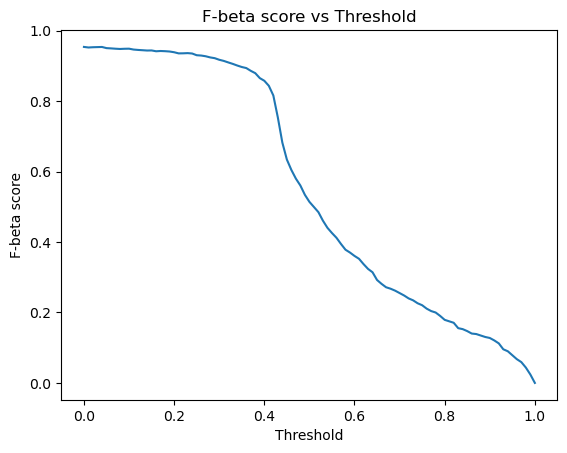

In [26]:
import matplotlib.pyplot as plt

plt.plot(thresholds, f_scores)
plt.xlabel('Threshold')
plt.ylabel('F-beta score')
plt.title('F-beta score vs Threshold')
plt.show()

## Интерпретация модели [5 баллов]

Часто нам хочется интерпритировать предсказания модели - понять, как наши признаки влияют на её ответ.
В случае сложных моделей сделать это не просто - чем сложнее модель, тем более сложные закономерности она извлекает и тем тяжелее нам их понять.

Но в случае логистической регресии это просто сделать, посмотрев на её обучаемые параметры (вспоминайте!).

Получите список признаков, которые увеличивают вероятность метки 0.
Аналогично для метки 1.

In [27]:
X = dfScale.drop('gender', axis=1)

est = solv.best_estimator_.coef_[0]
features_0 = list(X.columns[est < 0])
print('Признаки, увеличивающие вероятность метки 0:')
print(features_0)

Признаки, увеличивающие вероятность метки 0:
['Авиалинии, авиакомпании, нигде более не классифицированные', 'Автобусные линии', 'Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка', 'Агенты и менеджеры по аренде недвижимости', 'Аксессуары для женщин', 'Аптеки', 'Ассоциации — гражданские, социальные и братские', 'Беспошлинные магазины Duty Free', 'Больницы', 'Булочные', 'Ветеринарные услуги', 'Галереи и художественные посредники', 'Готовая женская одежда', 'Дантисты, ортодонтисты', 'Денежные переводы', 'Детская одежда, включая одежду для самых маленьких', 'Доктора, нигде ранее не классифицируемые', 'Драгоценные камни и металлы, часы и ювелирные изделия', 'Звонки с использованием телефонов, считывающих магнитную ленту', 'Зоомагазины', 'Зубные и медицинские лаборатории', 'Изготовление и продажа меховых изделий', 'Иной сервис', 'Клубы — сельские клубы, членство(спортивный, отдых, спорт), частные поля для гольфа', '

In [28]:
features_1 = list(X.columns[est > 0])
print('Признаки, увеличивающие вероятность метки 1:')
print(features_1)

Признаки, увеличивающие вероятность метки 1:
['Авиалинии, авиакомпании', 'Автозапчасти и аксессуары', 'Автоматизированные бензозаправки', 'Автомойки', 'Автошины', 'Агентства по аренде автомобилей', 'Бакалейные магазины, супермаркеты', 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков', 'Бизнес-сервис', 'Билльярд-клубы', 'Боулинг-клубы', 'Бытовое оборудование', 'Веломагазины — продажа и обслуживание', 'Видеопрокат', 'Галереи/учреждения видеоигр', 'Генеральные подрядчики по вентиляции, теплоснабжению, и водопроводу', 'Горючее топливо — уголь, нефть, разжиженный бензин, дрова', 'Денежные переводы MasterCard MoneySend', 'Дилеры по продаже печатной продукции', 'Дорожный и мостовой сборы, пошлины', 'Жилье — отели, мотели, курорты', 'Информационные провайдеры', 'Кабельные и другие платные телевизионные услуги', 'Канцелярия, офисные сопутствующие товары, бумага для печатания и письма', 'Кинотеатры', 'Компьютерная сеть/информационные услуги', 'Компьюте

# Часть 4: ва-банк / пространство для творчества [макс 30 баллов]

Добейтесь максимального качества, больше качество - больше баллов.

Стратегия подготовки данных и обучения модели на ваше усмотрение.

Условия:
* Оценка на отложенной тестовой группе пользователей, использовавшейся в прошлых пунктах (20%)
* В качестве метрики используйте ROC_AUC

__Замечание__: 

Ответа на вопрос "какое нужно качество для максимального балла?" не будет.

Используйте все свои знания, чтобы добиться наилучшего результата.

In [29]:
# Ваш код здесь